<a href="https://colab.research.google.com/github/mcorbach/Machine-Learning-Ed.-Digital---Nov21/blob/main/Machine_Learning_Chapter3_SupervisedL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning

### Supervised Learning with scikit-learn

ML es el campo que enseña a las máquinas y ordenadores a aprender de los datos existentes para hacer predicciones sobre nuevos datos: ¿será un tumor benigno o maligno? ¿Cuáles de sus clientes llevarán su negocio a otra parte? ¿Es un correo electrónico un spam? 

En esta sección del curso, aprenderás a usar Python para realizar aprendizaje supervisado (supervised learning), un componente esencial del ML. Aprenderás a crear modelos predictivos, ajustar sus parámetros y determinar qué tan bien se desempeñarán con datos nuevos, todo mientras utilizas conjuntos de datos del mundo real. Utilizarás scikit-learn, una de las bibliotecas de aprendizaje automático más populares y fáciles de usar para Python.

## Librerias necesarias

En la próxima celda se importan las librerías principales de python a utilizar en esta sección.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns   

# CLASIFICACIÓN ---------------------------------------------------------------

## El dataset de Iris

Este data set se puede encontrar en los datasets propios de sklearn, lo descargaremos como se muestra en las siguientes celdas:

In [ ]:
from sklearn import datasets

In [ ]:
iris= datasets.load_iris()  # iris es un diccionario con los datos

In [ ]:
print(iris.keys())  

# iris.data  son los datos de sepal y petal lenght y widht
# iris.target contiene codificado numericamente la especie de la flor

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
type(iris.data), type(iris.target)  # son numpy.ndarrays 

(numpy.ndarray, numpy.ndarray)

In [ ]:
iris.data.shape # tamaño de los datos: 150 flores han sido estudiadas

(150, 4)

Target variable: 

0 -> Setosa
1 -> versicolor
2 -> Virginica


In [ ]:
iris.target #veis la codificacion de las especies en números?

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Como veis ya estos datos vienen separados: en iris.data tenemos las variables explicativas y en iris.target la variable respuesta/dependiente o variable target: la especie de la flor codificada en número (0, 1, 2).

## EDA sencillo, ver los datos

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = iris.data # features
y = iris.target # target
df = pd.DataFrame(X, columns=iris.feature_names)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Scatter matrix

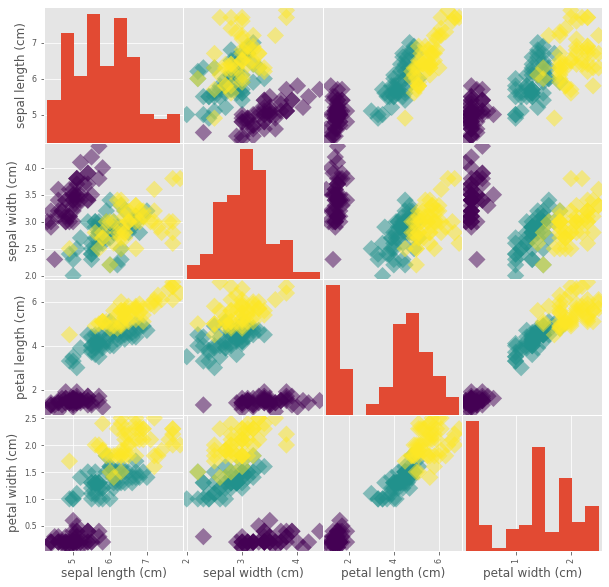

In [ ]:
# De una vez, con este gráfico podemos ver 
# los scatter plor de todas las variables y sus histogramas
pd.plotting.scatter_matrix(df, c = y, figsize=[10,10], s=150, marker= 'D')

plt.show()

## Ejercicio

Completa los códigos para hacer un EDA sencillo de los datos del UCI Machine Learning Repository consistentes de los votos hechos por el *US House of Representatives Congressmen*.

En este dataset tendremos votos a favor ==1 o en contra == 0 según la filiación política (republicana o demócrata) en varias areas. La variable target es la filiación política.

Explora el data set! Sólo tienes que completar el código

In [ ]:
house = pd.read_csv('house_votes_mod.csv')

In [ ]:
# Chequea las primeras cinco líneas del dataframe house
house.  #COMPLETA

In [ ]:
# Chequea el tamaño del dataframe house
  .shape #COMPLETA

In [ ]:
# usa el metodo .describe() para ver informacion estadistica resumida
   .describe() #COMPLETA

In [ ]:
# Usa el método .info() para chequear los tipos de datos

   .info()  #COMPLETA

## EDA Visual 

Veamos algunos gráficos, te presentamos código ya completo para que aprendas otras herramientas!

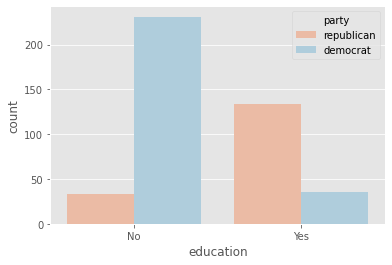

In [ ]:
plt.figure()
sns.countplot(x='education', hue='party', data=house, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Sobre educación qué partido a votado mayoritariamente por el No?

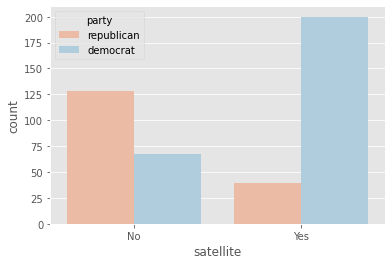

In [ ]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=house, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Sobre el tema de satélites qué partido a votado mayoritariamente por el No?

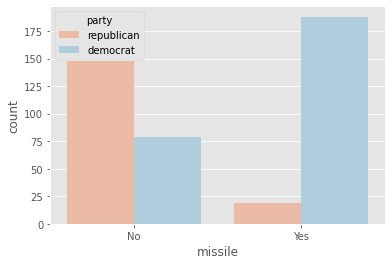

In [ ]:
plt.figure()
sns.countplot(x='missile', hue='party', data=house, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Sobre el tema de misiles qué partido a votado mayoritariamente por el Si?

## k – Nearest Neighbors en Iris dataset

In [ ]:
# importamos el modelo
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
# 1. Siempre debemos "inicializar" el modelo, lo asignamos a una variable con sus parámetros

# número de vecinos = 6, luego probaremos otras opciones
knn = KNeighborsClassifier( n_neighbors=6) 

In [ ]:
# 2. Hacemos el fit a los datos, necesitamos las features y el target!

knn.fit(iris['data'], iris['target']) # como np array, sin missing values (NaN)

#Siempre haremos:  MODELO.fit(X, y) siendo X las features y siendo y el target

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# 3. Ahora el modelo ha sido entrenado, lo podemos usar para predecir!

# Nos inventamos datos nuevos de sepal y petal lenght y widht
# Estamos usando datos para 3 flores

X_new= np.array ([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])

X_new.shape

(3, 4)

In [ ]:
# Ahora si! el predict!

prediction = knn.predict(X_new) 

#Siempre haremos:  MODELO.predict(X_nuevo)  y el resultado es la variable
# target pero estimada por nuestro modelo

In [ ]:
prediction # Se predicen 2 flores versicolor, una setosa

array([1, 1, 0])

## Ejercicio

Es tu turno de probar esta metodología con los datos de votos según filiación política.

Completa el código si es señalado.

### k-Nearest Neighbors: Fit


In [ ]:
# Creamos los arrays para las features y la variable target
y = house['party'].values  # el target
X = house.drop('party', axis=1).values # todo menos la variable target

In [ ]:
# Crea un k-NN classifier con 6 vecinos
knn = KNeighborsClassifier(n_neighbors=  ) #COMPLETA

# Fit el clasificador a los datos
knn.fit(  ,y)  #COMPLETA

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict


In [ ]:
# te proporciono estos datos para que pruebes el predict
X_new=np.array([[0.696469, 0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,  0.68483,  0.480932,  0.392118,  0.343178,  0.72905,  0.438572,  0.059678, 0.398044,0.737995]])

In [ ]:
X_new.shape

(1, 16)

In [ ]:
# Predice para los nuevos datos de un sólo político, su filiacion más probable

new_prediction = knn.predict(  )  #COMPLETA
print("Prediction: {}".format(new_prediction))

EXCELENTE! ya has hecho tus primeras predicciones, pero qué tan seguros estamos de ellas?

### Performance: TRAIN/TEST Set

Para probar qué tan bueno es nuestro modelo debemos dividir nuestro set de datos en dos set: train (70-80%) y test (30-20%). De esta manera entrenamos nuestro modelo con los datos de train y probamos el modelo sobre un set que nunca ha visto (test). Qué tan cerca está la predicción de la realidad, en el set de test, nos indicará si el performance del modelo es aceptable.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# En este caso la proporción es 70 % train, 30% test: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 21, stratify= y)

# la variable test_size = 0.3 indica que la proporcion de datos para el set de test es del 30%

In [ ]:
knn = KNeighborsClassifier (n_neighbors= 8)
knn.fit(X_train, y_train)   # ENTRENAMOS CON TRAIN

#--------------------------------
y_pred = knn.predict(X_test) # HACEMOS EL PREDICT SOBRE LOS DATOS DE TEST


In [ ]:
print("Test set predictions:{}".format(y_pred))

Test set predictions:[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [ ]:
knn.score(X_test, y_test)  # ESTA ES LA COMPARACION DE y_pred con y_test!

0.9555555555555556

## DataSet de Digits recognition

Trabajarás con el conjunto de datos de reconocimiento de dígitos MNIST, que tiene 10 clases, ¡los dígitos del 0 al 9! uno de los conjuntos de datos incluidos en scikit-learn es una versión reducida del conjunto de datos MNIST y ese es el que usaremos en este ejercicio.

Cada muestra de este conjunto de datos de scikit-learn es una imagen de 8x8 que representa un dígito escrito a mano. Cada píxel está representado por un número entero en el rango de 0 a 16, lo que indica niveles variables de negro.


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

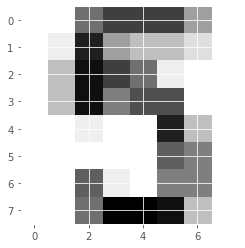

In [ ]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Parece que la imagen en cuestión corresponde al dígito '5'. Ahora, ¿puedes construir un clasificador que pueda hacer esta predicción no solo para esta imagen, sino para todas las demás en el conjunto de datos? 

### Train/Test Split + Fit/Predict/Accuracy


In [ ]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set: 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Increíblemente, este clasificador k-NN listo para usar con 7 vecinos aprendió de los datos de entrenamiento y predijo las etiquetas de las imágenes en el conjunto de prueba con una precisión del 98%, ¡y lo hizo en menos de un segundo! Esta es una ilustración de lo increíblemente útiles que pueden ser las técnicas de aprendizaje automático.

### Overfitting y underfitting


En la siguiente celda aprenderás a implementar el cálculo de la curva para analizar overfitting y underfitting,usando distintos valores de neighbors (k). Al observar cómo difieren los puntajes de precisión para los conjuntos de entrenamiento y test con diferentes valores de k, desarrollarás tu intuición para identificar overfitting y underfitting.


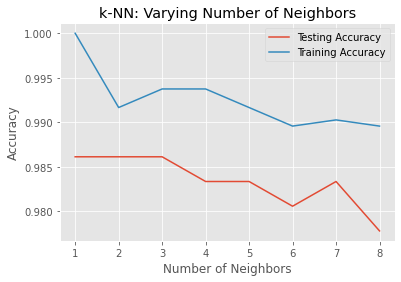

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Parece que la precisión en el set de test es máxima cuando se utilizan 3 vecinos. El uso de 8 vecinos o más parece dar como resultado un modelo simple que no se ajusta tan bien a los datos y el uso de 1 vecino (k muy bajo) muestra un muy buen resultado en train pero no igual de bueno en test (overfitting). Ahora que has comprendido los fundamentos de la clasificación, aprenderás sobre la regresión.

# REGRESION ---------------------------------------------------------------------

In [ ]:
boston = pd.read_csv('boston.csv') #load the data

In [ ]:
boston.head() #MEDV median value of occupied homes in thousands of dollars -> TARGET

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Separamos en X e y
X = boston.drop('MEDV', axis=1).values  # todas las columnas excepto MEDV, sólo los valores
y = boston['MEDV'].values # columna MEDV, sólo los valores

In [ ]:
y.shape

(506,)

In [ ]:
## EJEMPLO SÓLO USANDO LA VARIABLE DE NUMERO DE HABITACIONES

X_rooms = X[:,5] #average number of rooms 

In [ ]:
y = y.reshape(-1,1) # re-shape necesario para el algoritmo

In [ ]:
X_rooms.shape

(506,)

In [ ]:
y.shape # antes su tamaño era (506,), no lo acepta el algoritmo así

(506, 1)

In [ ]:
X_rooms = X_rooms.reshape(-1,1)

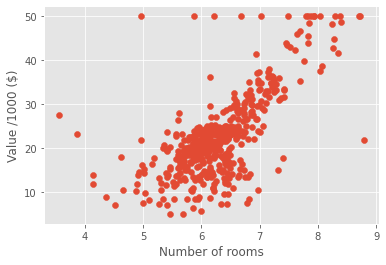

In [ ]:
plt.scatter(X_rooms, y)
plt.ylabel('Value /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

# PARECE UNA RELACIÓN LINEAL ENTRE EL PRECIO DE LAS CASAS Y EL NUMERO DE HABITACIONES

### Modelo de LinearRegression usando solo una variable explicativa

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()  #inicializamos el modelo

In [ ]:
reg.fit(X_rooms,y)  # ajustamos el modelo a los datos (X,y)

LinearRegression()

In [ ]:
# "datos nuevos" para probar predicción
prediction_space= np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 

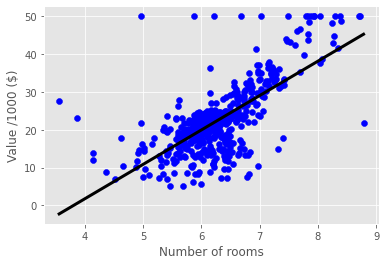

In [ ]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('Value /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

# reg.predict(prediction_space) -> ESTO ES Y_PRED

## Linear Regrression con todas las features

In [ ]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

In [ ]:
reg_all.score(X_test, y_test) 
# el score, en el caso de regresión es el famoso R2 (R cuadrado)
# mientras más cercano a 1 mejor es el resultado

0.7112260057484943

In [ ]:
# Podemos también calcular el Root Mean Squared Error:
from sklearn.metrics import mean_squared_error

In [ ]:

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7112260057484943
Root Mean Squared Error: 4.638689926172812


## Cross - validation

En las siguientes celdas te muestro cómo implementar la cross-validation, revisa el vídeo y la ppt para que tengas muy claro el significado de hacerlo!

Este procedimiento maximiza la cantidad de datos que se utilizan para entrenar el modelo, ya que durante el curso del entrenamiento, el modelo no solo se entrena, sino que también se prueba en todos los datos disponibles.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Create the regressor: reg_all
reg_all = LinearRegression()

cv_results = cross_val_score(reg, X, y, cv = 5) #cv de cinco folds

print( cv_results) # resultado del score por cada split

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [ ]:
np.mean(cv_results)

0.3532759243958792

# Modelos Regularizados

## Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.6996938275127311

## Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

0.5950229535328551

### Lasso para feature selection

In [ ]:
names = boston.drop('MEDV', axis=1).columns

In [ ]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

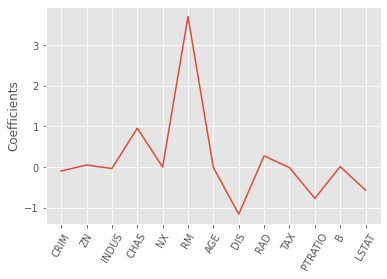

In [ ]:
plt.plot( range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

Cuál es la variable más relevante para la variable de precio medio de las casas?

# Qué tan bueno es tu modelo ----------------------------------------------

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Metricas para clasificacion


Accuracy no siempre es la mejor metrica, por ello en las siguientes celdas te enseño cómo implementar el cálculo de la matriz de confusión y cómo generar un reporte de clasificación.

Aquí, trabajarás con el conjunto de datos de PIMA Indians obtenido del UCI Machine Learning Repository. El objetivo es predecir si un paciente determinado contraerá diabetes en función de características como el IMC, la edad y el número de embarazos. Por tanto, es un problema de clasificación binaria. Un valor target de 0 indica que el paciente no tiene diabetes, mientras que un valor de 1 indica que el paciente tiene diabetes.

In [ ]:
diabetes= pd.read_csv('diabetes.csv')

In [ ]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

# Create arrays for the features and the response variable
y = diabetes['diabetes'].values
X = diabetes.drop('diabetes', axis=1).values



In [ ]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)




In [ ]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))


[[176  30]
 [ 56  46]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## Logictic regression y la curva ROC  

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression() #inicializa 

In [ ]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)


In [ ]:
logreg.fit(X_train, y_train)  # de momento no hagamos caso del warning, queremos ilustrar
# cómo llegar a la curva ROC
y_pred= logreg.predict(X_test) 

C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thesholds =roc_curve(y_test, y_pred_prob)

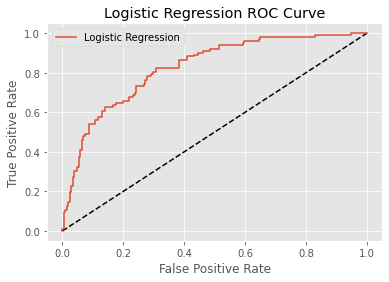

In [ ]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

Mientras mas grande el area de nuestra curva mejor! -> AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, y_pred_prob)

0.8260517799352751

### La podemos usar en cross validation

In [ ]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc') # obviamos los warnings

C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
print(cv_scores)

[0.80814815 0.80777778 0.82666667 0.87471698 0.83584906]


# Hyperparameter tuning

## Grid search con cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV

Para los mismos datos de diabetes, usando modelo KNN

In [ ]:
param_grid = { 'n_neighbors': np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier() #Para un modelo de Knn usando los datos de diabetes

knn_cv = GridSearchCV(knn, param_grid, cv=5) # con cv de 5 folds

In [ ]:
knn_cv.fit(X,y) #vote

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_params_ # numero de k para el mejor resultado

{'n_neighbors': 14}

In [ ]:
knn_cv.best_score_  # mejor resultado

0.7578558696205755

Para los mismos datos de diabetes usando el modelo de LogisticRegression(),
obvia los warnings!


In [ ]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5) # con cv de 5 folds

# Fit it to the data
logreg_cv.fit(X,y)



C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7747899159663865


## Hyperparameter tuning con  RandomizedSearchCV

GridSearchCV puede ser costoso computacionalmente, una solución para ello es usar RandomizedSearchCV, en el que no se prueban todos los valores de hiperparámetros. En cambio, se utiliza un número fijo de configuraciones de hiperparámetros a partir de distribuciones de probabilidad especificadas.

En las proximas celdas te enseñaré además un nuevo modelo: Arboles de decisión. No te preocupes de los detalles de este modelo, así como k-NN, linear regression, y logistic regression, los decision trees tienen los métodos .fit() y .predict() que hemos aprendido a usar. Este modelo tiene muchos parámetros: max_features, max_depth, and min_samples_leaf, etc, lo que lo convierte en un caso ideal para probar el RandomizedSearchCV.

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()




In [ ]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7}
Best score is 0.732608695652174


# Pre-processing -----------------------------------------------------------------

In [ ]:
autos = pd.read_csv('auto.csv')

In [ ]:
autos.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [ ]:
### Transformemos origin para poder utilizar esa variable en nuestros modelos!

In [ ]:
df_origin = pd.get_dummies(autos)
df_origin.head()  


,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [ ]:
# si es cero europe y Us es aj juro Asia asi que podemos hacer drop de esta columna

df_origin = df_origin.drop('origin_Asia', axis=1)

In [ ]:
# Create arrays for features and target variable
X= df_origin.drop(['mpg'],axis=1).values
y = df_origin['mpg'].values

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
ridge = Ridge(alpha = 0.5, normalize=True).fit(X_train, y_train)

ridge.score(X_test, y_test)

0.7190645190217895

## missing data

In [ ]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Remplazamos valores en las columnas indicadas:

In [ ]:
diabetes.insulin.replace(0, np.nan, inplace=True)
diabetes.triceps.replace(0, np.nan, inplace=True)
diabetes.bmi.replace(0, np.nan, inplace=True)

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


## qué hacer con la missing data?

In [ ]:
diabetes.shape

(768, 9)

In [ ]:
# 1. drop all nan
df =diabetes.dropna() #perdemos la mitad de los datos!!!
df.shape

(393, 9)

In [ ]:
# imputar valores a los datos nan, educated guess
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # imputamos la media

In [ ]:
# Create arrays for features and target variable
X= diabetes.drop(['diabetes'],axis=1).values
y = diabetes['diabetes'].values

In [ ]:
imputer.fit(X) # ajustamos para llevar a cabo la imputacion sobre los datos

X = imputer.transform(X) # transformamos los datos 

# Imputer con una pipeline

Dado que el imputer y algunas transformaciones tienen un fit y transform, se puede hacer un "pipeline" con todo esto, por pasos (steps) y simplemente aplicar la pipeline con todo incluido, es más elegante y util en ciertos casos!

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean') # inicializo imputer
logreg = LogisticRegression()  # inicializo modelo

steps = [('imputation', imp), ('logistic_regression', logreg)] #indico los pasos en el orden

pipeline = Pipeline(steps) # todo en una linea


In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train) # en una sola linea hizo de una vez la imputacion y el fit del modelo

C:\Users\urdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputation', SimpleImputer()),
                ('logistic_regression', LogisticRegression())])

In [ ]:
y_pred = pipeline.predict(X_test) # ahora usamos para predecir
pipeline.score(X_test, y_test)

0.7229437229437229

# Escalar los datos

In [ ]:
df = pd.read_csv('white_wine.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [ ]:
df.quality.replace([4,3], [0,0], inplace=True)
df.quality.replace([5, 6, 7,8,9], [1,1,1,1, 1], inplace=True)

Estos datos tienen distintas escalas, no queremos que valores altos dominen al modelo, por lo que tenemos que normalizar

# Maneras de normalizar

In [ ]:
# Create arrays for features and target variable
X= df.drop(['quality'],axis=1).values
y = df['quality'].values

### Scale

In [ ]:
from sklearn.preprocessing import scale  # Con Scale

In [ ]:
X_scaled = scale(X)

In [ ]:
np.mean(X), np.std(X) # Antes de escalar 

(18.432687072460002, 41.54494764094571)

In [ ]:
np.mean(X_scaled), np.std(X_scaled) # datos escalados

(2.7314972981668206e-15, 0.9999999999999999)

### Con StandardScaler y en pipelines

In [ ]:
from sklearn.preprocessing import StandardScaler # Con standard scaler Y EN PIPELINE

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)


# Compute and print metrics
print('Accuracy : {}'.format(knn_scaled.score(X_test, y_test)))



Accuracy : 0.964625850340136
